In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive (for Colab usage)
drive.mount('/content/drive')

# Load results
b0_results = pd.read_csv("/content/drive/MyDrive/lung_project/models_b0/fold_results_b0.csv")
b1_results = pd.read_csv("/content/drive/MyDrive/lung_project/models_b1/fold_results_b1.csv")

# Rename for clarity
b0_results = b0_results.rename(columns={"Accuracy": "B0_Accuracy", "Loss": "B0_Loss"})
b1_results = b1_results.rename(columns={"Accuracy": "B1_Accuracy", "Loss": "B1_Loss"})

# Merge
comparison = pd.merge(b0_results, b1_results, on="Fold")
print("\n📊 Fold-wise Comparison:\n")
print(comparison.to_markdown(index=False))

# Summary
print("\n📈 Summary:")
print(f"B0 Mean Accuracy: {comparison['B0_Accuracy'].mean():.4f} ± {comparison['B0_Accuracy'].std():.4f}")
print(f"B1 Mean Accuracy: {comparison['B1_Accuracy'].mean():.4f} ± {comparison['B1_Accuracy'].std():.4f}")


Mounted at /content/drive

📊 Fold-wise Comparison:

|   Fold |   B0_Accuracy |   B0_Loss |   B1_Accuracy |   B1_Loss |
|-------:|--------------:|----------:|--------------:|----------:|
|      1 |      0.948148 |  0.208047 |      0.977778 | 0.196293  |
|      3 |      0.977778 |  0.117419 |      0.925926 | 0.242668  |
|      4 |      0.977778 |  0.108983 |      0.992593 | 0.0569412 |
|      5 |      0.97037  |  0.130337 |      0.985185 | 0.0803422 |

📈 Summary:
B0 Mean Accuracy: 0.9685 ± 0.0140
B1 Mean Accuracy: 0.9704 ± 0.0302


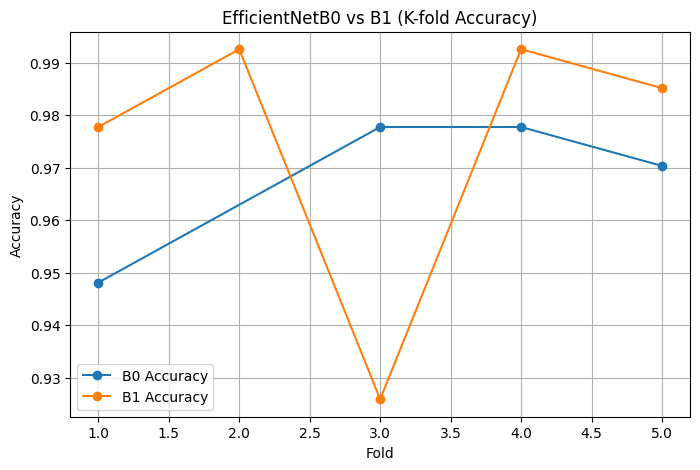

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(b0_results['Fold'], b0_results['B0_Accuracy'], marker='o', label="B0 Accuracy")
plt.plot(b1_results['Fold'], b1_results['B1_Accuracy'], marker='o', label="B1 Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("EfficientNetB0 vs B1 (K-fold Accuracy)")
plt.legend()
plt.grid(True)
plt.show()
